Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 39s - loss: 0.2352 - val_loss: 0.1808
Epoch 2/50
60000/60000 [==============================] - 40s - loss: 0.1710 - val_loss: 0.1610
Epoch 3/50
60000/60000 [==============================] - 40s - loss: 0.1552 - val_loss: 0.1484
Epoch 4/50
60000/60000 [==============================] - 40s - loss: 0.1466 - val_loss: 0.1437
Epoch 5/50
60000/60000 [==============================] - 40s - loss: 0.1414 - val_loss: 0.1361
Epoch 6/50
60000/60000 [==============================] - 40s - loss: 0.1372 - val_loss: 0.1354
Epoch 7/50
60000/60000 [==============================] - 40s - loss: 0.1344 - val_loss: 0.1312
Epoch 8/50
60000/60000 [==============================] - 40s - loss: 0.1316 - val_loss: 0.1288
Epoch 9/50
60000/60000 [==============================] - 40s - loss: 0.1296 - val_loss: 0.1268
Epoch 10/50
600


/usr/lib/python2.7/dist-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


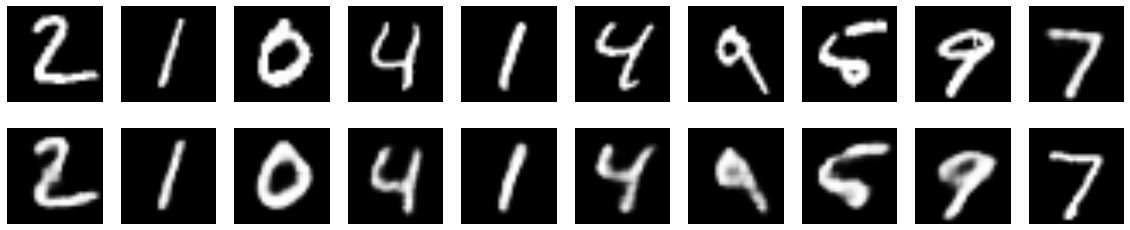

In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(1, 28, 28))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

decoded_imgs = autoencoder.predict(x_test)

%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
